# Programming for Data Science - CA2 - AY 23/24
<table align="center">
    <thead>
    <tr><td>Category</td><td>Value</td></tr>
    </thead>
    <tbody>
        <tr><td>Name</td><td>M.Rajkaran</td></tr>
        <tr><td>Admin</td><td>2109039</td></tr>
        <tr><td>Class</td><td>DIT/FT/2A/02</td></tr>
        <tr><td>Elective Class</td><td>EL/EP0302/FT/03</td></tr>
    </tbody>
</table>

## Datasets Used


<table align=center>
    <thead><tr><td><strong>Dataset Name</strong></td><td><strong>Description</strong></td><td><strong>Link</strong></tr></td></thead>
    <tbody>
        <tr><td>Graduate Employment Survey - NTU, NUS, SIT, SMU, SUSS & SUTD</td><td>The starting salary and employment rate across different universities and degrees in Singapore.</td><td><a src="https://data.gov.sg/dataset/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd">data.gov.sg</a></td></tr>
        <tr><td>Universities - Intake, Enrolment and Graduates by Course</td><td>The intake number of intake,enrolment and graduates across different courses in Singapore</td><td><a src="https://beta.data.gov.sg/datasets/443/view">data.gov.sg</a></td></tr>
        <tr><td>Government Recurrent Expenditure on Education Per Student</td><td>The government expenditure on educational institutions over the years</td><td><a src="https://beta.data.gov.sg/datasets/414/view">data.gov.sg</a></td></tr>
        <tr><td>World Happiness Report</td><td>Happiness levels of countries around the world.</td><td><a src="https://www.kaggle.com/datasets/unsdsn/world-happiness">kaggle.com</a></td></tr>
        <tr><td>Countries by IQ - Average IQ by Country 2023</td><td>The average IQ across different countries in 2023.</td><td><a src="https://worldpopulationreview.com/country-rankings/average-iq-by-country">worldpopulationreview.com</a></td></tr>
    </tbody>
</table>

## Importing necessary packages

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

## Reading Data

In [197]:
graduate_employment_survey = pd.read_csv("./Datasets/Graduate Employment Survey/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.csv", encoding='latin1')
average_iq = pd.read_csv("./Datasets/Average IQ by Country 2023/average-iq-by-country-2023.csv")
government_expenditure =  pd.read_csv("./Datasets/Government Expenditure/GovernmentRecurrentExpenditureonEducationPerStudent.csv")
uni_intake = pd.read_csv("./Datasets/University Intake/UniversitiesIntakeEnrolmentandGraduatesbyCourse.csv")

## happiness data
world_happiness_2020 = pd.read_csv("./Datasets/World Happiness Report/2020.csv")
world_happiness_2021 = pd.read_csv("./Datasets/World Happiness Report/2021.csv")
world_happiness_2022 = pd.read_csv("./Datasets/World Happiness Report/2022.csv")


### Function to describe datasets

In [198]:
def text_analysis(dataset):
    print(f"First few rows of this dataset:\n{dataset.head()}")
    print(f"\n\nThe shape of this dataset is:\n{dataset.shape}")
    print(f"\n\nColumns of this dataset:\n{dataset.columns}")


### Text Analysis of Graduate Employment Survey

#### Cleaning the dataset, removing unwanted columns

In [199]:
graduate_employment_survey = graduate_employment_survey.drop(columns=['basic_monthly_median','gross_monthly_median','gross_mthly_25_percentile','gross_mthly_75_percentile'])
graduate_employment_survey.replace('na', float('nan'), inplace=True)
graduate_employment_survey.dropna(inplace=True)

In [200]:
text_analysis(graduate_employment_survey)

First few rows of this dataset:
   year                        university  \
0  2013  Nanyang Technological University   
1  2013  Nanyang Technological University   
2  2013  Nanyang Technological University   
3  2013  Nanyang Technological University   
4  2013  Nanyang Technological University   

                                          school  \
0  College of Business (Nanyang Business School)   
1  College of Business (Nanyang Business School)   
2  College of Business (Nanyang Business School)   
3  College of Business (Nanyang Business School)   
4                         College of Engineering   

                                        degree employment_rate_overall  \
0                     Accountancy and Business                    97.4   
1  Accountancy (3-yr direct Honours Programme)                    97.1   
2     Business (3-yr direct Honours Programme)                    90.9   
3                       Business and Computing                    87.5   
4             

### Text Analysis of Government Recurrent Expenditure on Education Per Student

In [201]:
text_analysis(government_expenditure)

First few rows of this dataset:
   year         type_of_educational_institution  expenditure_per_student
0  1986                         Primary Schools                     1404
1  1986                       Secondary Schools                     1931
2  1986  Junior Colleges/Centralised Institutes                     2606
3  1986                            Polytechnics                     4143
4  1986        Institute of Technical Education                     3924


The shape of this dataset is:
(216, 3)


Columns of this dataset:
Index(['year', 'type_of_educational_institution', 'expenditure_per_student'], dtype='object')


### Text Analysis of Universities - Intake, Enrolment and Graduates by Course

In [202]:
uni_intake = uni_intake[uni_intake.sex != 'F']

In [203]:
uni_intake_2011 = uni_intake[(uni_intake.year == 2011) &(uni_intake.course == 'Education')]

intake_2011 = uni_intake_2011.intake.copy()
enrolment_2011 = uni_intake_2011.enrolment.copy()
graduates_2011 = uni_intake_2011.graduates.copy()
years_array = [2010,2009,2008,2007,2006,2005]
for year in years_array:

    intake_2011 -= 50
    enrolment_2011 -= 50
    graduates_2011 -= 50

    uni_intake.loc[(uni_intake.year == year) & (uni_intake.course == 'Education'), 'intake'] = float(intake_2011)
    uni_intake.loc[(uni_intake.year == year) & (uni_intake.course == 'Education'), 'enrolment'] = float(enrolment_2011)
    uni_intake.loc[(uni_intake.year == year) & (uni_intake.course == 'Education'), 'graduates'] = float(graduates_2011)

In [204]:
text_analysis(uni_intake)

First few rows of this dataset:
   year sex                                course  intake  enrolment  \
0  2005  MF                           Accountancy     876       2561   
2  2005  MF  Architecture, Building & Real Estate     299       1310   
4  2005  MF             Business & Administration    1545       5013   
6  2005  MF                             Dentistry      33        139   
8  2005  MF                             Education      97       1452   

   graduates  
0        706  
2        180  
4       1256  
6         34  
8        106  


The shape of this dataset is:
(255, 6)


Columns of this dataset:
Index(['year', 'sex', 'course', 'intake', 'enrolment', 'graduates'], dtype='object')


### Text Analysis of Average IQ by Country 2023

#### Cleaning the dataset, removing unwanted columns like 'pop2023'

In [205]:
average_iq = average_iq.drop(columns=['pop2023'])

In [206]:
text_analysis(average_iq)

First few rows of this dataset:
   rank    country      iq
0     1      Japan  106.48
1     2     Taiwan  106.47
2     3  Singapore  105.89
3     4  Hong Kong  105.37
4     5      China  104.10


The shape of this dataset is:
(199, 3)


Columns of this dataset:
Index(['rank', 'country', 'iq'], dtype='object')


### Text Analysis of World Happiness Report

#### 2020

In [207]:
text_analysis(world_happiness_2020)

First few rows of this dataset:
  Country name Regional indicator  Ladder score  \
0      Finland     Western Europe        7.8087   
1      Denmark     Western Europe        7.6456   
2  Switzerland     Western Europe        7.5599   
3      Iceland     Western Europe        7.5045   
4       Norway     Western Europe        7.4880   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   
3                        0.059616      7.621347      7.387653   
4                        0.034837      7.556281      7.419719   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991                72.402504   
2              10.979933        0.942847                74.1024

#### 2021

In [208]:
text_analysis(world_happiness_2021)

First few rows of this dataset:
  Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74

#### 2022

In [209]:
text_analysis(world_happiness_2022)

First few rows of this dataset:
   RANK      Country Happiness score Whisker-high Whisker-low  \
0     1      Finland           7,821        7,886       7,756   
1     2      Denmark           7,636        7,710       7,563   
2     3      Iceland           7,557        7,651       7,464   
3     4  Switzerland           7,512        7,586       7,437   
4     5  Netherlands           7,415        7,471       7,359   

  Dystopia (1.83) + residual Explained by: GDP per capita  \
0                      2,518                        1,892   
1                      2,226                        1,953   
2                      2,320                        1,936   
3                      2,153                        2,026   
4                      2,137                        1,945   

  Explained by: Social support Explained by: Healthy life expectancy  \
0                        1,258                                 0,775   
1                        1,243                                 0,7

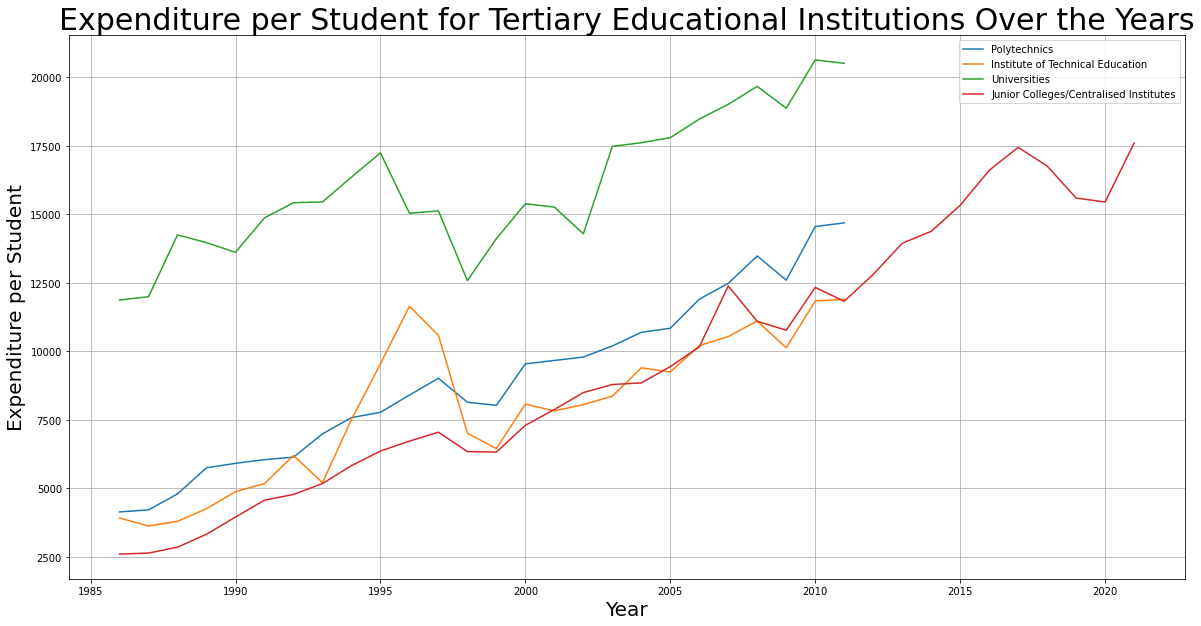

In [210]:
tertiary = ['Polytechnics', 'Institute of Technical Education', 'Universities', 'Junior Colleges/Centralised Institutes']
grouped_by_tertiary = government_expenditure[government_expenditure['type_of_educational_institution'].isin(tertiary)]

plt.figure(figsize=(20, 10))

for institution in tertiary:
    institution_data = grouped_by_tertiary[grouped_by_tertiary['type_of_educational_institution'] == institution]
    plt.plot(institution_data['year'], institution_data['expenditure_per_student'], label=institution)

plt.xlabel('Year',fontsize=20)
plt.ylabel('Expenditure per Student',fontsize=20)
plt.title('Expenditure per Student for Tertiary Educational Institutions Over the Years',fontsize=30)
plt.legend()
plt.grid(True)
plt.show()


In [211]:
happiness_2020 = world_happiness_2020.head(3)
happiness_2021 = world_happiness_2021.head(3)
happiness_2022 = world_happiness_2022.head(3)

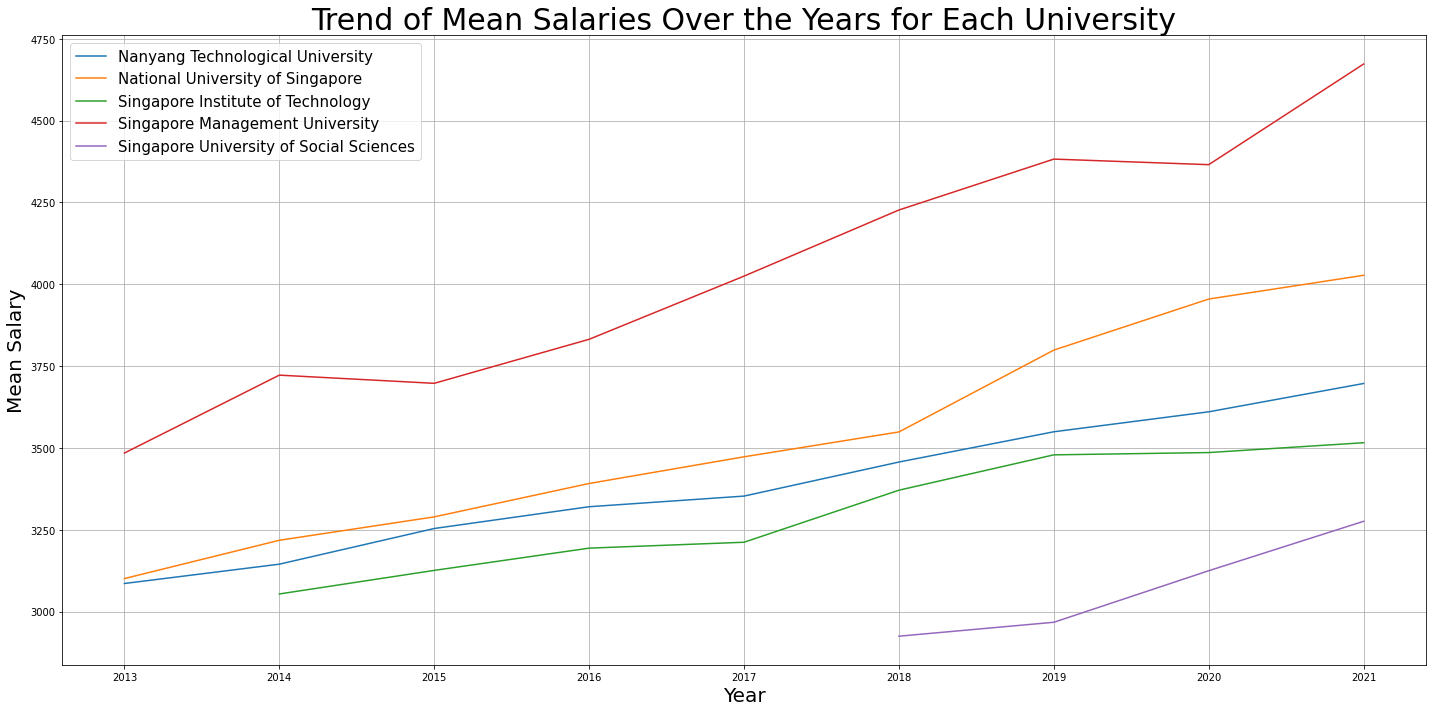

In [220]:
# Step 3: Filter relevant columns and convert year to numeric data type
filtered_data = graduate_employment_survey[["year", "university", "basic_monthly_mean"]].copy()
filtered_data["year"] = pd.to_numeric(filtered_data["year"], errors="coerce")

# Step 4: Group the data by university and year, and calculate the mean salary for each university in each year
grouped_data = filtered_data.groupby(["university", "year"])["basic_monthly_mean"].median().reset_index()

plt.figure(figsize=(20, 10))

universities = grouped_data["university"].unique()
for university in universities:
    data_by_university = grouped_data[grouped_data["university"] == university]
    plt.plot(data_by_university.year, data_by_university.basic_monthly_mean, label=university)

plt.xlabel('Year',fontsize=20)
plt.ylabel('Mean Salary',fontsize=20)
plt.title('Trend of Mean Salaries Over the Years for Each University',fontsize=30)
plt.legend(prop={'size': 15})
plt.grid(True)

plt.tight_layout()
plt.show()

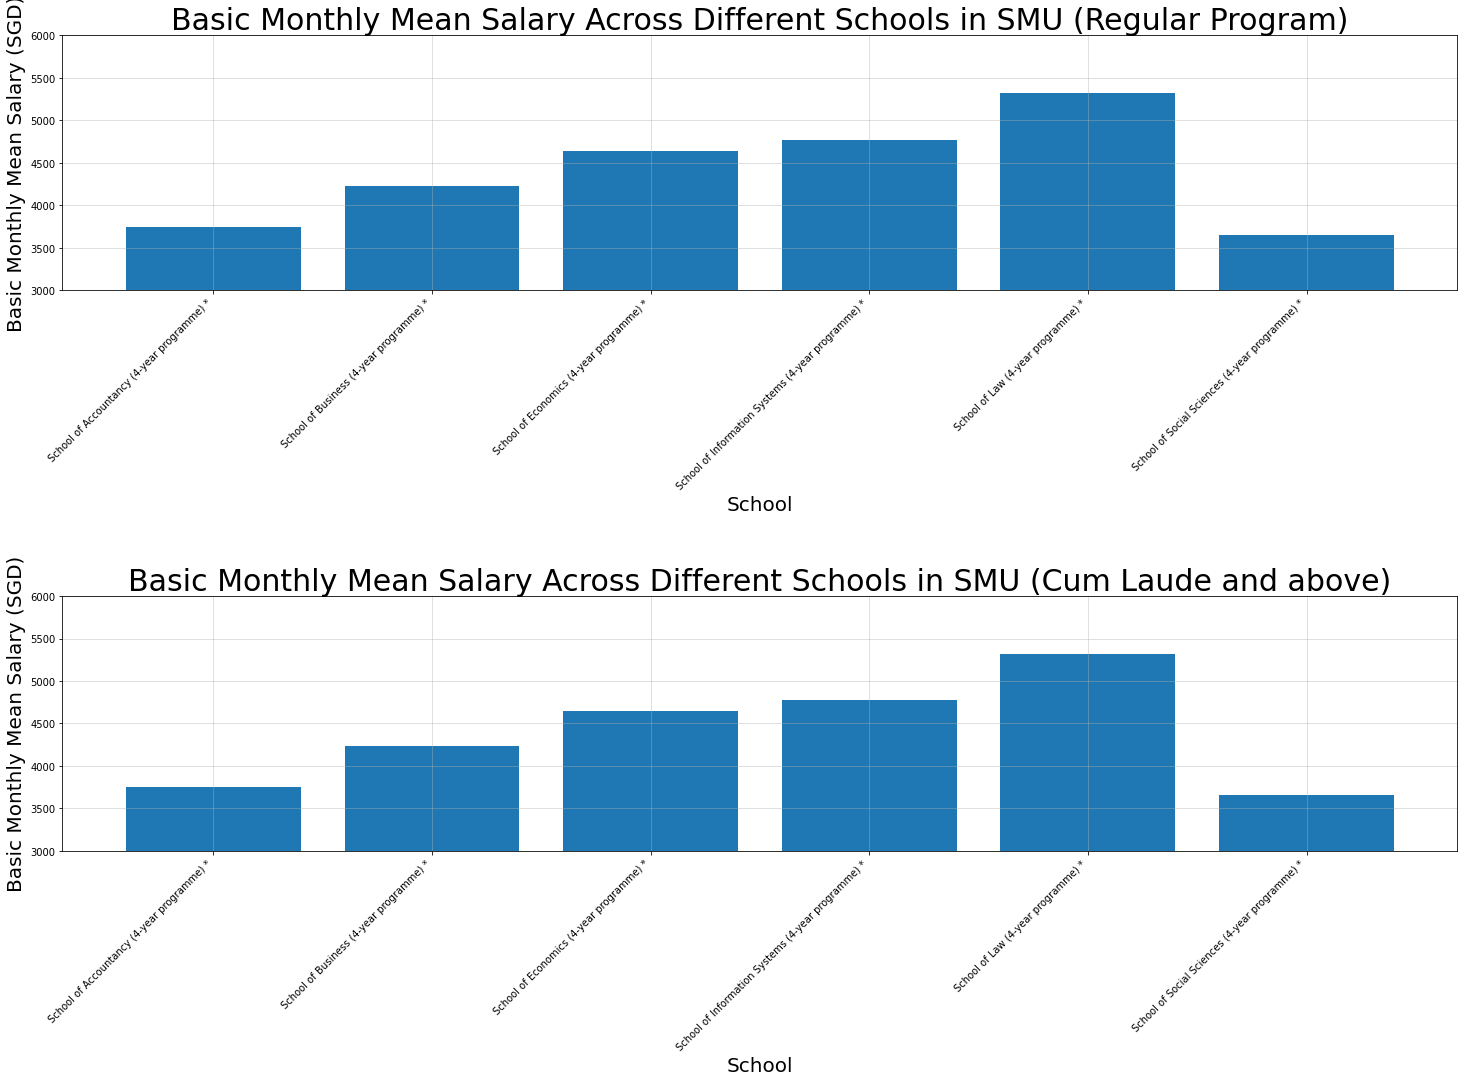

In [213]:
smu_filtered = graduate_employment_survey[graduate_employment_survey.university == 'Singapore Management University']
smu_filtered = smu_filtered[smu_filtered.year == 2021]

without_cum = smu_filtered[~smu_filtered.degree.str.contains(' Cum Laude and above', na=False)]
without_cum = without_cum[~without_cum.degree.str.contains(r' \(Cum Laude and above\)', na=False)]

mean_salary_regular = without_cum.groupby('school').basic_monthly_mean.mean().reset_index()


with_cum = smu_filtered[smu_filtered.degree.str.contains(r' \(Cum Laude and above\)', na=False)]
mean_salary_cum = with_cum.groupby('school').basic_monthly_mean.mean().reset_index()

plt.figure(figsize=(25, 15))

plt.subplot(2,1,1)
plt.ylim(3000, 6000)
plt.bar(mean_salary_regular.school, mean_salary_regular.basic_monthly_mean)
plt.xlabel('School',fontsize=20)
plt.ylabel('Basic Monthly Mean Salary (SGD)',fontsize=20)
plt.title('Basic Monthly Mean Salary Across Different Schools in SMU (Regular Program)',fontsize=30)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.5)

plt.subplot(2, 1, 2)
plt.ylim(3000, 6000)
plt.bar(mean_salary_regular.school, mean_salary_regular.basic_monthly_mean)
plt.xlabel('School',fontsize=20)
plt.ylabel('Basic Monthly Mean Salary (SGD)',fontsize=20)
plt.title('Basic Monthly Mean Salary Across Different Schools in SMU (Cum Laude and above)',fontsize=30)
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(hspace=1.2)
plt.grid(alpha=0.5)
plt.show()


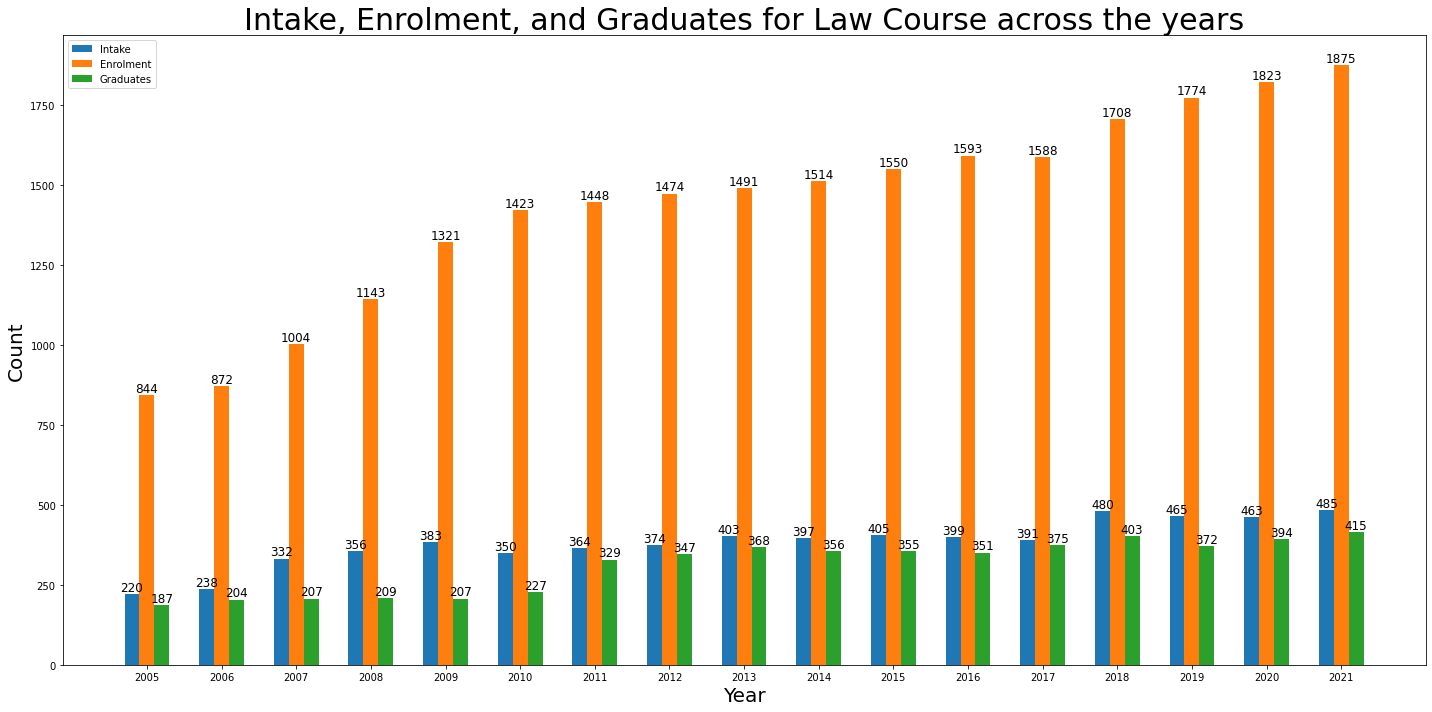

In [221]:
law_subset = uni_intake[uni_intake.course == 'Law']

# Set up the plot
plt.figure(figsize=(20, 10))
width = 0.2
index = law_subset.year.unique()

# Grouped bar chart for 'intake'
plt.bar(index - width, law_subset.intake, width, label='Intake')
plt.bar(index, law_subset.enrolment, width, label='Enrolment')
plt.bar(index + width, law_subset.graduates, width, label='Graduates')

# Add value labels on top of each bar
for i, v in enumerate(law_subset.intake):
    plt.text(index[i] - width, v, str(v), ha='center', va='bottom', fontsize=12)

for i, v in enumerate(law_subset.enrolment):
    plt.text(index[i], v, str(v), ha='center', va='bottom', fontsize=12)

for i, v in enumerate(law_subset.graduates):
    plt.text(index[i] + width, v, str(v), ha='center', va='bottom', fontsize=12)

plt.xlabel('Year',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Intake, Enrolment, and Graduates for Law Course across the years',fontsize=30)
plt.xticks(index, law_subset.year)
plt.legend()

plt.tight_layout()
plt.show()